Import

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
import sys
sys.path.append("../input")

Import and memory save of data

In [11]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

df_train = import_data("input/train.csv")
df_train.shape

Memory usage of dataframe is 0.09 MB
Memory usage after optimization is: 0.04 MB
Decreased by 60.2%


(134, 90)

In [12]:
df_train.iloc[:, -1:].head()

,score
0,7.500000
1,6.062500
2,7.265625
3,7.781250
4,7.882812


array([[<Axes: title={'center': 'score'}>]], dtype=object)

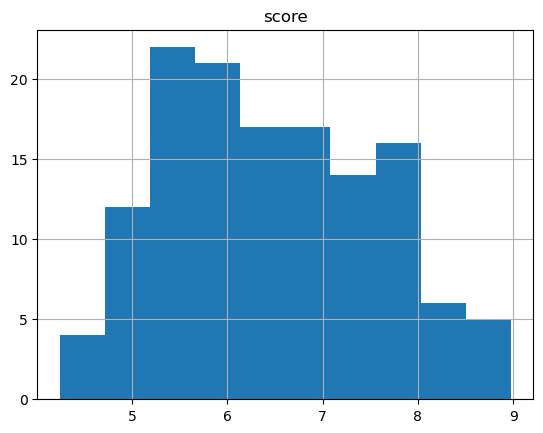

In [13]:
df_train.hist(column=["score"], bins=10)

In [14]:
from sklearn import preprocessing
xp = df_train.copy()
min_max_scaler = preprocessing.MinMaxScaler()
xp.iloc[:,0:-1] = min_max_scaler.fit_transform(xp.iloc[:,0:-1].to_numpy())
xp.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,AU45_r,bvpMean,bvpSD,edaMean,edaSD,hrMean,hrSD,tempMean,tempSD,score
0,0.000507,0.000714,0.000266,0.000714,0.000478,0.001634,0.009239,0.007120,0.005832,0.146200,...,0.918853,0.666975,0.341690,0.882477,0.271959,0.632997,0.175994,0.711684,0.054265,7.500000
1,0.143085,0.083410,0.064634,0.010533,0.017703,0.006685,0.004200,0.005426,0.001433,0.008853,...,0.632334,0.139620,0.343151,0.280929,0.563011,0.469697,0.377564,0.100152,0.023574,6.062500
2,0.002079,0.002041,0.000607,0.002931,0.004088,0.001848,0.001417,0.003054,0.001900,0.002745,...,0.895811,0.055099,0.032599,0.322914,0.703219,0.427609,0.686503,0.121396,0.086129,7.265625
3,0.029038,0.014249,0.013248,0.030746,0.012141,0.046795,0.037375,0.023519,0.028913,0.035735,...,0.341056,0.002188,0.003199,0.291465,0.000000,0.180135,0.078121,0.420334,0.241458,7.781250
4,0.016300,0.019692,0.005846,0.027291,0.014478,0.052417,0.045000,0.026698,0.024078,0.031235,...,0.092856,0.046613,0.036844,0.428474,0.543917,0.385522,0.390225,0.283763,0.032699,7.882812


In [15]:
y = df_train.iloc[:, -1:]
df_train = xp.iloc[:, 0:-1]

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
lista = range(1,90)
aa=[]
bb=[]
for f in tqdm(lista):
    aa.append(f)
    pca = PCA(n_components=f).fit(df_train)
    
a = 0
for e in lista:
    a=a+pca.explained_variance_ratio_[e-1]
    bb.append(a)

C:\Users\baryd\AppData\Local\Temp\ipykernel_24668\1691221361.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for f in tqdm(lista):


  0%|          | 0/89 [00:00<?, ?it/s]

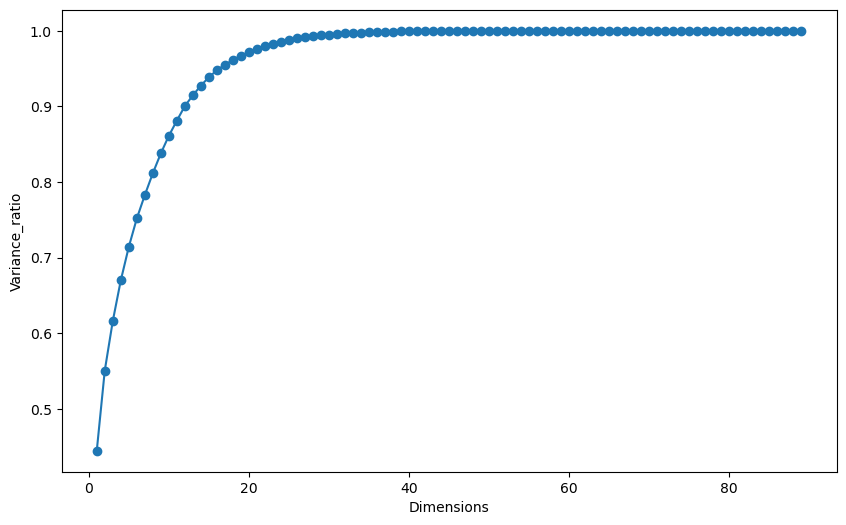

In [17]:
fig, ax = plt.subplots(figsize = (10,6))
plot = plt.plot(aa, bb, '-o')
ax.set_xlabel("Dimensions")
ax.set_ylabel("Variance_ratio"); 

In [18]:
# Apply PCA for dimension reduction
pca = PCA(n_components=20).fit(df_train)
X_pca = pca.transform(df_train)
print(sum(pca.explained_variance_ratio_))

0.9717604327015579


Model Training

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size = 0.2)

In [20]:
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor



XGB = XGBRegressor()

In [21]:
from sklearn.metrics import mean_squared_error
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(mse)

0.3189443
